<a href="https://colab.research.google.com/github/Pushpit07/Cancer_Prediction_using_SVM/blob/main/SVM_Custom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
X, y = make_classification(n_classes=2, n_samples=400, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=3)

In [3]:
# in svm, we have y = -1 or 1
# but here we have y = 0 or 1

# convert all y = 0 to y= -1
y[y==0] = -1

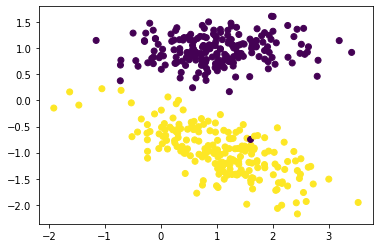

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [5]:
class SVM:
    def __init__(self, C=1.0):
        self.C = C # penalty
        self.W = 0 # weights
        self.b = 0 # bias
        
    def hingeloss(self, W, b, X, y):
        loss = 0.0
        
        loss += .5 * np.dot(W, W.T)
        
        for i in range(X.shape[0]):
            ti = y[i] * (np.dot(W, X[i].T) + b)
            loss += self.C * max(0, 1-ti)

        return loss[0][0] # to get scalar value from matrix # [[loss]]
    
    def fit(self, X, y, batch_size=100, lr=0.01, maxItr=300):
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        n = lr
        c = self.C
        
        # initialize the model parameters
        W = np.zeros((1, no_of_features))
        bias = 0
        
        losses = []
        
        # training loop
        for i in range(maxItr):
            l = self.hingeloss(W, bias, X, y)
            losses.append(l)
            # for batch size, get random points
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            # gradient descent batch wise with random shuffling
            for batch_start in range(0, no_of_samples, batch_size):
                # assume gradient is 0 for the batch at first
                gradw = 0
                gradb = 0
                
                # iterate over all the examples in the minibatch
                for j in range(batch_start, batch_start + batch_size):
                    if j < no_of_samples:
                        i = ids[j]
                        ti = y[i] * (np.dot(W, X[i].T) + bias)
                        
                        if ti >=1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c * y[i] * X[i]
                            gradb += c * y[i]
                W = W - n * W + n * gradw
                bias = bias + n * gradb
        self.W = W
        self.b = bias
        return W, bias, losses

In [6]:
model = SVM(C=10)
# if c (penalty), will be increased, then the margin will reduce because model will try to reduce the penalty by reducing the distance
W, b, losses = model.fit(X, y, maxItr=100)

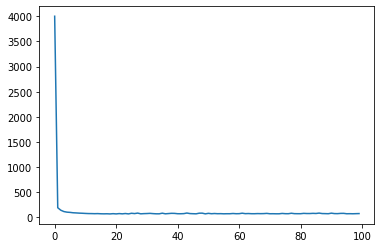

In [7]:
plt.plot(losses)

In [8]:
def plot_hyperplane(w1, w2, b):
    plt.figure(figsize=(12, 12))
    x1 = np.linspace(-2, 4, 10)
    x2 = -(w1 * x1 + b)/w2
    xp = -(w1 * x1 + b + 1)/w2
    xn = -(w1 * x1 + b - 1)/w2
    
    plt.plot(x1, x2, label="WX+B=0")
    plt.plot(x1, xp, label="WX+B=1")
    plt.plot(x1, xn, label="WX+B=-1")
    plt.legend()
    
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.show()

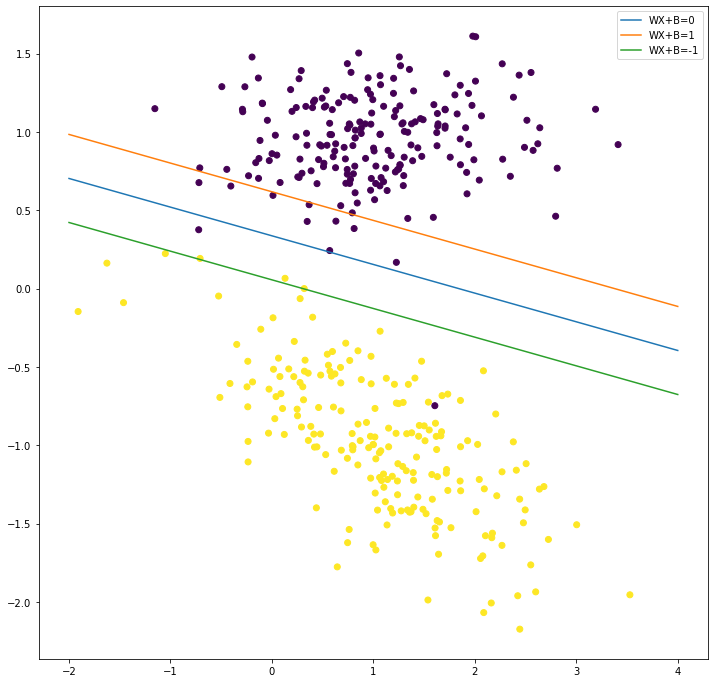

In [9]:
plot_hyperplane(W[0,0], W[0, 1], b)